<a href="https://colab.research.google.com/github/FarShid-Hosseinzadeh/AI-Homeworks/blob/main/MP2_Hosseinzadeh_9821203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1:

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 13H9qGbsruLMG_CYNJZbzV2-azcP1Q09f

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=13H9qGbsruLMG_CYNJZbzV2-azcP1Q09f
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 29.0MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/Perceptron.csv')
df

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X)
print(y)

           x1        x2
0    1.028503  0.973218
1    0.252505  0.955872
2    1.508085  0.672058
3    1.940002  1.721370
4   -1.048819 -0.844999
..        ...       ...
395  0.574634  0.782211
396 -1.413307 -0.673049
397 -0.465114 -1.290830
398  1.522055  0.948007
399  0.834118  0.926710

[400 rows x 2 columns]
0     -1.0
1     -1.0
2     -1.0
3     -1.0
4      1.0
      ... 
395   -1.0
396    1.0
397    1.0
398   -1.0
399   -1.0
Name: y, Length: 400, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [8]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [19]:
def accuracy(y, y_hat, threshold = 0):
  y_hat = np.where(y_hat < threshold, -1, 1)
  acc = np.sum(y == y_hat) / len(y)
  return acc

In [21]:
y_pred = perceptron.predict(X_test)

acc = accuracy(y_test, y_pred)
print(f"Accuracy on test set: {acc * 100:.2f}%")

Accuracy on test set: 100.00%


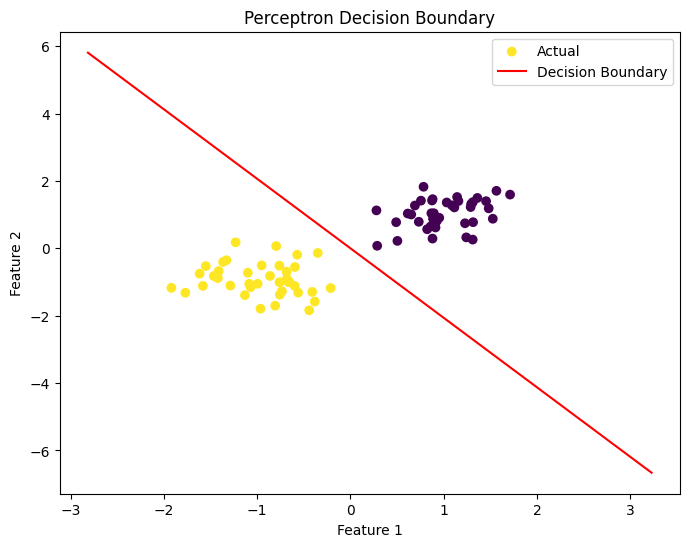

In [22]:
if X_train.shape[1] == 2:
    w = perceptron.coef_[0]
    b = perceptron.intercept_

    x0 = np.linspace(np.min(X_train.iloc[:, 0]) - 1, np.max(X_train.iloc[:, 0]) + 1, 100)
    x1 = -(w[0] * x0 + b) / w[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', label='Actual')
    plt.plot(x0, x1, color='red', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

In [38]:
def accuracy_new(y, y_hat, threshold = 0.5):
  y_hat = np.where(y_hat < threshold, -1, 1)
  acc = np.sum(y == y_hat) / len(y)
  return acc

In [39]:
y_pred = perceptron.predict(X_test)

acc = accuracy_new(y_test, y_pred)
print(f"Accuracy on test set: {acc * 100:.2f}%")

Accuracy on test set: 100.00%


# Question 2:

In [2]:
import pandas as pd
import numpy as np
import itertools

In [3]:
class McCulloch_Pitts():

  def __init__(self, weights, threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, x):
    if self.weights @ x >= self.threshold:
      return 1
    else:
      return 0

In [4]:
def multiplier(input):
  neur1 = McCulloch_Pitts([1, 1, 1, 1], 4)
  r1 = neur1.model(np.array([input[0], input[1], input[2], input[3]]))

  neru21 = McCulloch_Pitts([1, -1, 1], 2)
  r21 = neru21.model(np.array([input[0], input[1], input[2]]))
  neru22 = McCulloch_Pitts([1, 1, -1], 2)
  r22 = neru22.model(np.array([input[0], input[2], input[3]]))
  neru2 = McCulloch_Pitts([1, 1], 1)
  r2 = neru2.model(np.array([r21, r22]))

  neru31 = McCulloch_Pitts([1, -1, 1], 2)
  r31 = neru31.model(np.array([input[0], input[2], input[3]]))
  neru32 = McCulloch_Pitts([1, -1, 1], 2)
  r32 = neru32.model(np.array([input[0], input[1], input[3]]))
  neru33 = McCulloch_Pitts([1, 1, -1], 2)
  r33 = neru33.model(np.array([input[1], input[2], input[3]]))
  neru34 = McCulloch_Pitts([-1, 1, 1], 2)
  r34 = neru34.model(np.array([input[0], input[1], input[2]]))
  neru3 = McCulloch_Pitts([1, 1, 1, 1], 1)
  r3 = neru3.model(np.array([r31, r32, r33, r34]))

  neru4 = McCulloch_Pitts([1, 1], 2)
  r4 = neru4.model(np.array([input[1], input[3]]))

  y = [r1, r2, r3, r4]

  return y

In [5]:
a = [0, 1, 0, 1]
X = list(itertools.product(a, a, a, a))
input = []
for i in range(0, len(X)):
  n = input.count(X[i])
  if n == 0:
    input.append(X[i])

for i in range(0, len(input)):
  r = multiplier(input[i])
  print(str(input[i]) + ': result of the multiplication ' + str(r))

(0, 0, 0, 0): result of the multiplication [0, 0, 0, 0]
(0, 0, 0, 1): result of the multiplication [0, 0, 0, 0]
(0, 0, 1, 0): result of the multiplication [0, 0, 0, 0]
(0, 0, 1, 1): result of the multiplication [0, 0, 0, 0]
(0, 1, 0, 0): result of the multiplication [0, 0, 0, 0]
(0, 1, 0, 1): result of the multiplication [0, 0, 0, 1]
(0, 1, 1, 0): result of the multiplication [0, 0, 1, 0]
(0, 1, 1, 1): result of the multiplication [0, 0, 1, 1]
(1, 0, 0, 0): result of the multiplication [0, 0, 0, 0]
(1, 0, 0, 1): result of the multiplication [0, 0, 1, 0]
(1, 0, 1, 0): result of the multiplication [0, 1, 0, 0]
(1, 0, 1, 1): result of the multiplication [0, 1, 1, 0]
(1, 1, 0, 0): result of the multiplication [0, 0, 0, 0]
(1, 1, 0, 1): result of the multiplication [0, 0, 1, 1]
(1, 1, 1, 0): result of the multiplication [0, 1, 1, 0]
(1, 1, 1, 1): result of the multiplication [1, 0, 0, 1]


# Question 3:

# Question 4: